In [1]:
import kagglehub
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

100%|██████████| 346M/346M [00:02<00:00, 155MB/s]

Extracting files...


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


['seg_pred', 'seg_train', 'seg_test']

In [4]:
train_dir = os.path.join(path, 'seg_train')
val_dir = os.path.join(path, 'seg_test')

In [5]:
train_dir1 = os.path.join(train_dir, 'seg_train')
print(train_dir1)

/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train


In [6]:
val_dir1 = os.path.join(val_dir, 'seg_test')
print(val_dir1)

/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test


Used image size of (64,64) because anything larger was taking too long to load

Create two functions to load the images and their labels

In [7]:
IMG_SIZE = (64, 64)
NUM_CLASSES = 6

def load_images_from_class_folder(class_folder_path, img_size, label):
    images = []
    labels = []

    for filename in os.listdir(class_folder_path):
        img_path = os.path.join(class_folder_path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append(img)
            labels.append(label)

    return images, labels

In [8]:
def load_dataset(data_dir, img_size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)

    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_images, class_labels = load_images_from_class_folder(class_path, img_size, idx)
            images.extend(class_images)
            labels.extend(class_labels)

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)
    labels = to_categorical(labels, NUM_CLASSES)

    return images, labels, class_names

In [9]:
train_images, train_labels, class_names = load_dataset(train_dir1, IMG_SIZE)
val_images, val_labels, _ = load_dataset(val_dir1, IMG_SIZE)


#making sure the shape is correct and making sure class labels were correctly created
print("Training data shape:", train_images.shape, train_labels.shape)
print("Validation data shape:", val_images.shape, val_labels.shape)
print("Class names:", class_names)


Training data shape: (14034, 64, 64, 3) (14034, 6)
Validation data shape: (3000, 64, 64, 3) (3000, 6)
Class names: ['sea', 'street', 'mountain', 'glacier', 'buildings', 'forest']


In [29]:
#create and prepare dataframe for later
columns = ['Class 0 accuracy', 'Class 1 accuracy', 'Class 2 accuracy', 'Class 3 accuracy', 'Class 4 accuracy', 'Class 5 accuracy', 'Total accuracy']
df = pd.DataFrame(columns = columns)



In [92]:
#create first model with 3 convolutional layers, 3 pooling layers and a dense layer and dropout layer

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1],3)))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model1.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))


model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256))
model1.add(tf.keras.layers.Activation('relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(NUM_CLASSES))
model1.add(tf.keras.layers.Activation('softmax'))

#model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.025), metrics=['accuracy'])
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
cnn_model1 = model1
# Train the model.
cnn_model1.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=20)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7795 - loss: 0.6526
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7893 - loss: 0.5902
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7951 - loss: 0.5780
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8253 - loss: 0.5010
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8436 - loss: 0.4614
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8471 - loss: 0.4444
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8521 - loss: 0.4253
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8541 - loss: 0.4311
Epoch 9/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8608 - loss: 0.4167
Epoch 10/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8761 - loss: 0.3755
Epoch 11/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8568 - loss: 0.4154
Epoch 12/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

In [104]:
predictions = cnn_model1.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [105]:
true_classes = np.argmax(val_labels, axis=1)
cm = conf_matrix = confusion_matrix(true_classes, predicted_classes)

total_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Total Accuracy: {total_accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

num_classes = cm.shape[0]
per_class_accuracy = {}

for i in range(num_classes):
    true_positives = cm[i, i]
    false_negatives = np.sum(cm[i, :]) - true_positives
    per_class_accuracy[i] = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

for class_idx, accuracy in per_class_accuracy.items():
    print(f"Accuracy for class {class_idx}: {accuracy:.4f}")

Total Accuracy: 0.7377
Confusion Matrix:
[[400   9  45  38  17   1]
 [ 21 354   7  23  83  13]
 [ 70   2 361  77  14   1]
 [ 73   6  80 382  11   1]
 [ 26  49  29  20 303  10]
 [  7  21   9   7  17 413]]
Accuracy for class 0: 0.7843
Accuracy for class 1: 0.7066
Accuracy for class 2: 0.6876
Accuracy for class 3: 0.6908
Accuracy for class 4: 0.6934
Accuracy for class 5: 0.8713


In [106]:
#function to add accuracies to the dataframe for comparison later
def add_accuracy_row(df, index, class_accuracies_dict, total_accuracy):
    class_accuracies = [
        class_accuracies_dict.get(0),
        class_accuracies_dict.get(1),
        class_accuracies_dict.get(2),
        class_accuracies_dict.get(3),
        class_accuracies_dict.get(4),
        class_accuracies_dict.get(5)
    ]
    new_row = class_accuracies + [total_accuracy]
    df.loc[index] = new_row
    return df

In [107]:
df = add_accuracy_row(df, "SGD Optimizer, 32 Batch size, 0.025 LR", per_class_accuracy, total_accuracy)

In [108]:
df

,Class 0 accuracy,Class 1 accuracy,Class 2 accuracy,Class 3 accuracy,Class 4 accuracy,Class 5 accuracy,Total accuracy
"Adam Optimizer, 512 Batch size, 0.1 LR",0.762745,0.814371,0.733333,0.660036,0.741419,0.953586,0.774333
"Adam Optimizer, 128 Batch size, 0.1 LR",0.731373,0.816367,0.712381,0.728752,0.652174,0.938819,0.763000
"Adam Optimizer, 32 Batch size, 0.1 LR",0.468627,0.724551,0.664762,0.676311,0.643021,0.761603,0.655667
"Adam Optimizer, 512 Batch size, 0.025 LR",0.431373,0.828343,0.611429,0.569620,0.578947,0.782700,0.631667
"Adam Optimizer, 128 Batch size, 0.025 LR",0.054902,0.714571,0.659048,0.679928,0.713959,0.736287,0.589667
"Adam Optimizer, 32 Batch size, 0.025 LR",0.441176,0.481038,0.619048,0.345389,0.514874,0.793249,0.527667
"SGD Optimizer, 512 Batch size, 0.01 LR",0.719608,0.788423,0.655238,0.773960,0.675057,0.907173,0.753000
"SGD Optimizer, 128 Batch size, 0.01 LR",0.792157,0.880240,0.758095,0.828210,0.622426,0.953586,0.808333
"SGD Optimizer, 32 Batch size, 0.01 LR",0.843137,0.816367,0.748571,0.699819,0.810069,0.934599,0.805333
"SGD Optimizer, 512 Batch size, 0.025 LR",0.725490,0.868263,0.748571,0.768535,0.702517,0.915612,0.788000


For model 1 that included 3 convolutional layers and 3 pooling layers, I tried different combinations of learning rates, optimizers, and batch sizes to study the effect of individual accuracies of each class and overall accuracy. The first optimizer that I used was the Adam optimizer, which adjusts the learning rate based on past gradients, leading to faster convergence. We see that for the adam optimizer, and a learning rate of 0.01, as the batch size decreases, the accuracy decreases as well. This is counter-intuitive, because we should usually expect better generalization (and thus better predictions on test data which means higher accuracy). But the reason we see this might be due to the slower convergence of models with smaller batch sizes and it qould require more epochs to achieve higher accuracies. When we see the learning rate for an adam optimizer go from 0.01 to 0.025 (an increase in the learning rate), the overall accuracies are smaller. This could be due to the fact that a larger learning rate leads to model to overshoot the optimum and leads to instability in training. The second optimizer I used was the stochastic gradient optimizer which has a fixed learning rate for all parameters. We can see that for all combinations of batch sizes and learning rates, the model that uses SGD optimizer has higher total accuracies than the model that used the Adam optimizer. Similar to the Adam optimizer though, the smaller learning rate of 0.01 did better than the learning rate of 0.025 for all batch sizes. We also see that there is little variation in accuracies for the different batch sizes for a SGD optimized model and fixed learning rates.

In [10]:
#create second model with 6 convolutional layers and 3 pooling layers, with a dense layer and dropout layer
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1],3)))
model2.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model2.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model2.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model2.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))


model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(NUM_CLASSES))
model2.add(tf.keras.layers.Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn_model2 = model2
# Train the model.
cnn_model2.fit(
    train_images,
    train_labels,
    batch_size=512,
    epochs=20)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.2667 - loss: 1.6852
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5342 - loss: 1.1910
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5849 - loss: 1.0393
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6205 - loss: 0.9740
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6489 - loss: 0.8994
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6694 - loss: 0.8589
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7011 - loss: 0.7993
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7253 - loss: 0.7393
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7366 - loss: 0.7115
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7615 - loss: 0.6648
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7713 - loss: 0.6370
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accurac

In [12]:
predictions2 = cnn_model2.predict(val_images)
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = np.argmax(val_labels, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [13]:
cm2 = conf_matrix = confusion_matrix(true_classes2, predicted_classes2)

total_accuracy = accuracy_score(true_classes2, predicted_classes2)
print(f"Total Accuracy: {total_accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

num_classes = cm2.shape[0]
per_class_accuracy = {}

for i in range(num_classes):
    true_positives = cm2[i, i]
    false_negatives = np.sum(cm2[i, :]) - true_positives
    per_class_accuracy[i] = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

# Print per-class accuracy
for class_idx, accuracy in per_class_accuracy.items():
    print(f"Accuracy for class {class_idx}: {accuracy:.4f}")

Total Accuracy: 0.7727
Confusion Matrix:
[[360   3  99  38   8   2]
 [ 11 416   7   6  38  23]
 [ 25   1 451  43   3   2]
 [ 36   6 148 357   2   4]
 [ 22  60  51   8 278  18]
 [  2   7   6   1   2 456]]
Accuracy for class 0: 0.7059
Accuracy for class 1: 0.8303
Accuracy for class 2: 0.8590
Accuracy for class 3: 0.6456
Accuracy for class 4: 0.6362
Accuracy for class 5: 0.9620


Since we already tested different optimizers, learning rates, and batch sizes, I decided to only test to see how this model performed with the Adam optimizer, batch size of 512, and a learning rate of 0.01. We see that there is not much of a difference from the values we obtained from model 1 with the exact same hyperparamters. This in interesting because there is always a balance in adding more layers between overfitting or allowing a model to have a better fit.

In [24]:
import matplotlib.pyplot as plt

(-0.5, 63.5, 63.5, -0.5)

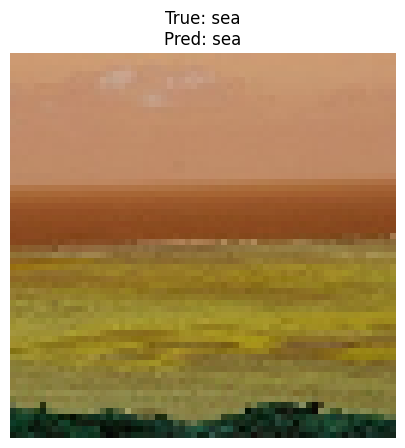

In [25]:
plt.figure(figsize=(10, 5))
img = val_images[0]
true_label = class_names[true_classes[0]]
predicted_label = class_names[predicted_classes[0]]
plt.imshow(img)
plt.title(f"True: {true_label}\nPred: {predicted_label}")
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

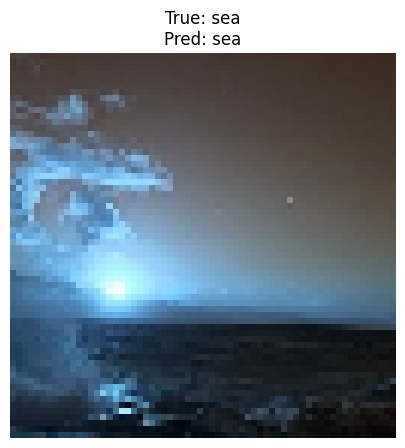

In [26]:
plt.figure(figsize=(10, 5))
img = val_images[5]
true_label = class_names[true_classes[5]]
predicted_label = class_names[predicted_classes[5]]
plt.imshow(img)
plt.title(f"True: {true_label}\nPred: {predicted_label}")
plt.axis('off')